# Import Libaries

In [315]:
import pandas as pd


# Import Data

In [316]:
df=pd.read_csv(r'C:\Users\Adnan\Desktop\Datasets\sport_data.csv')

# Basic Data Analysis

In [317]:
df

,Age,Height,Sex,Sport
0,13,3,Male,Soccer
1,16,4,Male,Soccer
2,17,4,Male,Soccer
3,15,5,Male,Basketball
4,17,6,Male,Basketball
5,18,5,Male,Basketball
6,15,3,Male,Hockey
7,13,3,Male,Hockey
8,13,4,Male,Hockey
9,13,3,Female,Soccer


In [318]:
df.shape

(18, 4)

In [319]:
df.describe()

,Age,Height
count,18.000000,18.000000
mean,15.166667,4.000000
std,1.917412,1.028992
min,13.000000,3.000000
25%,13.250000,3.000000
50%,15.000000,4.000000
75%,16.750000,4.750000
max,19.000000,6.000000



# Pre-Process Data

In [320]:
df['Sex'].replace(['Female','Male'],[0,1],inplace=True)

In [321]:
df

,Age,Height,Sex,Sport
0,13,3,1,Soccer
1,16,4,1,Soccer
2,17,4,1,Soccer
3,15,5,1,Basketball
4,17,6,1,Basketball
5,18,5,1,Basketball
6,15,3,1,Hockey
7,13,3,1,Hockey
8,13,4,1,Hockey
9,13,3,0,Soccer


# Import Machine Learning Libaries

In [322]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


# Seperate Features & Labels

In [323]:
X=df.drop(columns='Sport')
X

,Age,Height,Sex
0,13,3,1
1,16,4,1
2,17,4,1
3,15,5,1
4,17,6,1
5,18,5,1
6,15,3,1
7,13,3,1
8,13,4,1
9,13,3,0


In [324]:
Y=df['Sport']
Y

0         Soccer
1         Soccer
2         Soccer
3     Basketball
4     Basketball
5     Basketball
6         Hockey
7         Hockey
8         Hockey
9         Soccer
10        Soccer
11        Soccer
12    Basketball
13    Basketball
14    Basketball
15        Hockey
16        Hockey
17        Hockey
Name: Sport, dtype: object

# Split The Data

In [325]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,stratify=Y,random_state=4)

# Building Machine Learning Model

In [326]:
clf=DecisionTreeClassifier()

# Train the Model

In [327]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

# Test the Model

In [328]:
prediction=clf.predict(x_test)

In [329]:
prediction

array(['Hockey', 'Soccer', 'Basketball', 'Hockey', 'Hockey', 'Basketball'],
      dtype=object)

In [330]:
x_test

,Age,Height,Sex
7,13,3,1
1,16,4,1
5,18,5,1
0,13,3,1
8,13,4,1
4,17,6,1


In [331]:
y_test

7        Hockey
1        Soccer
5    Basketball
0        Soccer
8        Hockey
4    Basketball
Name: Sport, dtype: object

# Check For Efficacy

In [332]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [333]:
accuracy=accuracy_score(y_test,prediction)

In [334]:
accuracy

0.8333333333333334

# Predict with New Data

In [335]:
clf.predict([[21,6,1]])

C:\Users\Adnan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Basketball'], dtype=object)

# Save Model

In [336]:
import joblib

In [337]:
joblib.dump(clf,'sport_model.joblib')

['sport_model.joblib']

In [338]:
from sklearn.metrics import plot_confusion_matrix
from matplotlib import pyplot as plt

In [339]:
c_matrix=confusion_matrix(y_test,prediction)

In [340]:
c_matrix

array([[2, 0, 0],
       [0, 2, 0],
       [0, 1, 1]], dtype=int64)

C:\Users\Adnan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


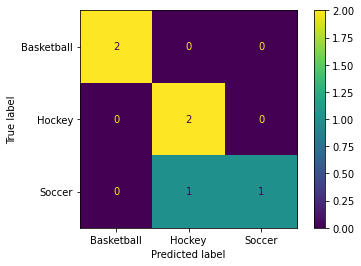

In [341]:
plot_confusion_matrix(clf,x_test,y_test)

In [342]:
y_test

7        Hockey
1        Soccer
5    Basketball
0        Soccer
8        Hockey
4    Basketball
Name: Sport, dtype: object

In [345]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

  Basketball       1.00      1.00      1.00         2
      Hockey       0.67      1.00      0.80         2
      Soccer       1.00      0.50      0.67         2

    accuracy                           0.83         6
   macro avg       0.89      0.83      0.82         6
weighted avg       0.89      0.83      0.82         6

